# COMP20230 Lab 1: Complexity Analysis

In order to express the complexity of an algorithm, we can count the number of machine instructions or basic operations that will execute as a function of the input parameters. Counting the operations can give us the running time $T(n)$. This can be simplfied to give us the complexity, $\mathcal{O}$ or big-Oh, by removing constants from the equation that would have a small impact on the overall complexity for very large values of $n$.



## 1. Complexity in Python

The complexity of an algorithm depends on the number of basic operations it contains. In this first exercise you will evaluate the complexity of simple Python functions - instead of algorithms. The idea is the same as algorithm analysis: identify the operations, count them. Take particular care of the loops.
Here is an example:

In [1]:
def function_a (n) :
    print("hello")
    for i in range(n):
        print("n = ", n, "; i=", i) 
    print (" bye ")

In [2]:
function_a(4)

hello
n =  4 ; i= 0
n =  4 ; i= 1
n =  4 ; i= 2
n =  4 ; i= 3
 bye 


The program enters n times in the loop \-  checking the loop condition takes 1 operation (incrementing *i*). The program does only 1 operation every time it enters the loop \- we have 1 * n operations here. Outside the loop there are 2 simple instructions (one before and one after) which do only 1 operation each.

In [3]:
def function_a(n):
    print("hello")          #1 operation
    for i in range(n):      #2 operation (assignment) per loop, N loops
        print("n = ", n)    #1 operation per loop, N operations
    print("bye")            #1 operation 

The running time of this algorithm is computed as follows: every operation with a "per loop" gives a factor of n: here 2 operations, so *3n*; every operation without a "per loop" gives you a value without an _n_: here 2. So in total, T(n)=3n + 2 meaning it is $\mathcal{O}$(n).

In the cell below we have a _magic_ command. These are notebook and not python commands. %%time will request that the OS times the execution of the cell for us and returns it in the cells output.

In [4]:
%%time

def function_b(n):
    print("starting for",n, "loops")          #1 operation
    for i in range(n):                        #2 operation (assignment) per loop, N loops
        for j in range(n):                        #2 operation (assignment) per loop, N loops
            max=n                             #1 operation per loop, N operations
    print("max n=",n)                         #1 operation 

a=3000
function_b(a)

starting for 3000 loops
max n= 3000
CPU times: user 323 ms, sys: 5.42 ms, total: 328 ms
Wall time: 326 ms


We can run the cell repeatedly, changing the value for a. I have done 7 example tests below and recoded the times. I then used the matplotlib (which intalls by default as part of anaconda) to plot $n$ against $t$.

In [5]:
n=[10,100,1000,3000,5000,8000, 10000]

t=[444e-6,619e-6,37.3e-3,340e-3,907e-3,2.45,3.72]

import matplotlib.pyplot as plt
plt.plot(n,t)
plt.show()

<Figure size 640x480 with 1 Axes>

Now do the same for the following 5 programs, labelling the operations and running for various values of $n$ and $m$ to validate the big-$\mathcal{O}$ experimentally. Watch out for the loop definitions.

In [6]:
def function_1(n):
    for i in range(11):
        print(i*n)

In [7]:
def function_2(n):
    s=1
    for i in range(n):
        s=s+i**2
    return s

In [8]:
def function_3(n):
    s=1
    for i in range(n):
        for j in range(n):
            s=s+i*j
    return s

In [9]:
def function_4(n,m):
    i=1;j=1
    opcount=2
    while i<=n and j<=m:
        i=i+1
        j=j+1
        opcount+=2
    return opcount

In [10]:
def function_5(n,m):
    i=1;j=1;s=1
    while i<=n:
        if j<=m:
            s=s*j
            j=j+1
    else:
            s=s+i
            i=i+1
    return s

Run these programs with different values of the $n$ and $m$ parameters. Pick one and experiment on plotting the times. Does the graph match the big-$\mathcal{O}$ you expected?

## 2. Poison Puzzle

An evil king has n bottles of wine, and a spy has just poisoned one of them. Unfortunately, they do not know which one it is. The poison is very deadly; just one drop diluted even a billion to one will still kill. Even so, it takes a full month for the poison to take effect. Design a scheme for determining exactly which one of the wine bottles was poisoned in just one month’s time while expending $\mathcal{O}(log(n))$ taste testers. Can you write code to prove the scheme?

## Hint 
Number each bottle and think about the binary expansion of each bottle’s number.

## Solution 
Number each bottle from 1 to n. Select $log(n)$ tasters and map each taster to a bit. On the first day of the month, a taster samples a wine if, in the binary representation of the wine’s number, his bit is 1. For example, if taster A is assigned to the lowest order bit and there are 5 bottles, he will sample bottles 1, 3, and 5. If taster B is assigned to the highest order bit, he will sample bottles 4 and 5.

After the month is over, the number of the poisoned bottle can be determined. If a taster dies, then the bit they mapped to is a 1 in the poisoned bottle’s number. Otherwise, the bit is a 0.

Bottles 🍾:
0 :  0000
1 :  0001
2 :  0010
3 :  0011
4 :  0100
5 :  0101
6 :  0110
7 :  0111
8 :  1000
Yellow are assigned Bottles 🍾 to Tasters 💀:


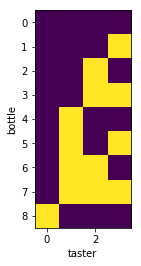

In [14]:
import math, random

nbottles = 9                                # let's assume there are 9 bottles to test with, this should scale for any number
ntasters= math.ceil(math.log2(nbottles))    # we are constrained to a max of log_2(n) tasters
tasters = list(range(ntasters))             # a list of tasters numbered 0,1,2,...,ntasters
bottles = list(range(nbottles))             # a list of bottles numbered 0 to nbottles


print("Bottles 🍾:")    
for bottle in bottles:
    binbottle=bin(bottle)                                           # assign a binary code corresponding to each bottle
    print(bottle, ": ", "{0:b}".format(bottle).zfill(ntasters))     # print it, format is just to get zero padding 

print("Yellow are assigned Bottles 🍾 to Tasters 💀:")  
bottlematrix=[]
for bottle in bottles:
    bottlematrix.append([int(d) for d in "{0:b}".format(bottle).zfill(ntasters)])
    
import matplotlib.pyplot as plt
plt.imshow(bottlematrix)
plt.xlabel('taster')
plt.ylabel('bottle')
plt.show()              

So once I have assigned the bottles, a taster just reads their column and goes off and tastes those bottles marked. Then they wait a month!

How can I find the bottle that matches a give set of dead tasters? Well I just list the tasters who are dead, e.g. if tasters 1,2,3 are dead then it is [0,1,1,1]. I can then write a function for search for that list of tasters.


In [12]:
import math

def binarysearch(myarray, elem):

    low = 0
    high = len(myarray) - 1
    while (low <= high):
        mid=math.ceil((low+high)/2) #ceil function rounds up to whole integer index
        if myarray[mid] > elem:
            high = mid - 1
        else:
            if myarray[mid] < elem:
                low = mid + 1 
            else:
                return mid

    return len(myarray) + 1 #to show the elem is not in the array

In [13]:
def poisonedbottle(listofdeadtasters):
    bottle=int(''.join(map(str, listofdeadtasters)),2)
    poisonedbottle=binarysearch(bottles, bottle)
    return poisonedbottle
    
listofdeadtasters=[0,1,1,1]    
print('The poisoned bottle 🍾 is index:', poisonedbottle(listofdeadtasters))

The poisoned bottle 🍾 is index: 7
